### Accessing INCA data

This Notebook showcases how to access the INCA-hourly data from the EODC stac catalogue.

**Necessary Imports**

In [1]:
import pystac.client as pc
import xarray as xr
from dask.distributed import LocalCluster
from pyproj import Transformer, CRS

To load data, you can use Dask:

In [ ]:
client = LocalCluster().get_client()
client.dashboard_link

**Accessing collection**

First you need to access the incal-hourly collection from the eodc stac catalogue. It only has one item, which is the whole zarr store, ranging from 15.03.2011 until present. You can find the metadata in the search results. 

Available parameters are:
- global radiation [W m-2]
- mean sea level pressure [Pa]
- 1-hour precipitation sum [kg m-2]
- wind speed in eastward direction [m s-1]
- wind speed in northward direction [m s-1]
- air temperature [°C]
- relative humidity [%]
- dew point temperature [°C]

In [ ]:
pc_client=pc.Client.open("https://stac.eodc.eu/api/v1")
search = pc_client.get_collection("incal-hourly")
search

To access the store with xarray you can use `xarray.open_zarr` with the href provided in `item.assets["zarr_store"]`. If you're only interested in a few parameters you can filter them accordingly to save on processing time when loading the data.

In [ ]:
ds = xr.open_zarr(search.assets["zarr_store"].href)
ds

**Filtering and visualizing**

The coordinate system of the dataset is MGI / Austria Lambert (EPSG: 31278). Using pyproj you can transform WGS84 coordinates, but you can of course also use the local coordinates. As the chunk size is 100x100km loading a 100x100 pixel area takes the same resources as a 1x1 pixel area.

In [4]:
transformer = Transformer.from_crs("EPSG:4326", ds.attrs["crs"], always_xy=True)
lon, lat = 16.374105, 48.199546
x, y = transformer.transform(lon, lat)

You can easily extract a timeseries from the dataset:

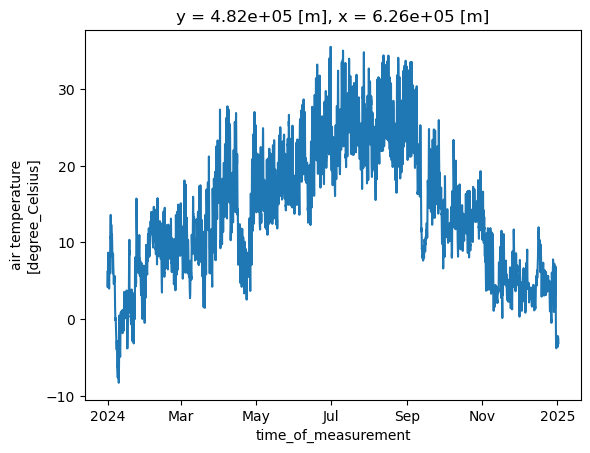

In [5]:
temp_vienna_ts = ds.sel(x=x, y=y, method='nearest').sel(time=slice("2024-01-01", "2025-01-01"))["T2M"].compute()
temp_vienna_ts.plot()

Or show an areal image

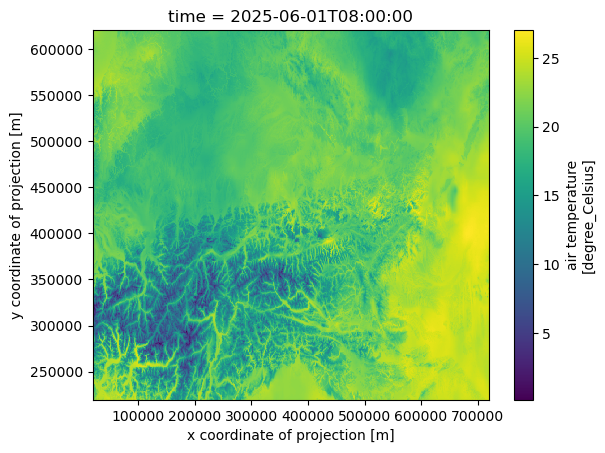

In [10]:
temp_aut = ds.sel(time="2025-06-01T08:00:00.000000000")["T2M"].compute()
temp_aut.plot()